In [1]:
import numpy as np
from matplotlib.pyplot import *
import descent
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib-1.5.dev1-py3.5-macosx-10.11-x86_64.egg/matplotlib/__init__.py:867: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Sparse linear regression

Again, we first generate a toy problem instance:

In [2]:
A = np.random.randn(50,100)
x = np.random.randn(100) * (np.random.rand(100) < 0.05)
y = A.dot(x)

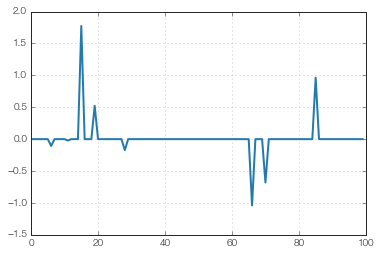

In [3]:
plot(x)
show()
draw()

## Least squares

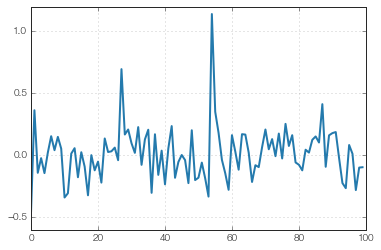

In [4]:
x_lsq = np.linalg.lstsq(A, y)[0]
plot(x_lsq)

## Subgradient descent

In [5]:
def f_df_subg(x, penalty=0.5):
    obj = 0.5 * np.linalg.norm(A.dot(x) - y) + penalty * np.linalg.norm(x, 1)
    grad = A.T.dot(A).dot(x) - A.T.dot(y) + penalty * np.sign(x)
    return obj, grad

In [6]:
opt_subg = descent.sgd(f_df_subg, x_lsq, learning_rate=1e-4)
opt_subg.display.every = 1000
opt_subg.run(1e4)

+----------------+-----------------+----------------+
|Iteration       | Objective       | Runtime        |
+----------------+-----------------+----------------+
|              0 |          7.7021 |             0 s|
|           1000 |          7.0589 |      193.119 μs|
|           2000 |           6.549 |      203.133 μs|
|           3000 |          6.1389 |       195.98 μs|
|           4000 |           5.788 |      197.887 μs|
|           5000 |          5.4705 |      197.172 μs|
|           6000 |          5.1825 |      249.863 μs|
|           7000 |          4.9195 |      266.075 μs|
|           8000 |          4.6894 |      202.894 μs|
|           9000 |          4.4693 |      197.172 μs|
+----------------+-----------------+----------------+
➛ Final objective: 4.257554304488544
➛ Total runtime: 2.18882 s
➛ All done!



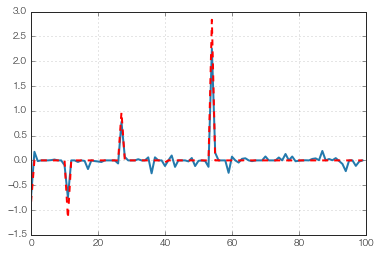

In [7]:
plot(opt_subg.theta)
plot(x, 'r--')

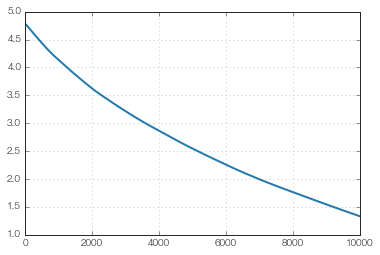

In [8]:
plot(opt_subg.storage.get('obj') - f_df_subg(x)[0])

In [9]:
opt_admm = descent.admm(x_lsq, 'linsys', A, y)
opt_admm.add('sparse', 0.5)
opt_admm.display.every = 10
opt_admm.run(100)

+----------------+-----------------+----------------+
|Iteration       | Objective       | Runtime        |
+----------------+-----------------+----------------+
|              0 |          2.2175 |             0 s|
|             10 |          1.9216 |      982.046 μs|
|             20 |         0.67564 |      519.991 μs|
|             30 |        0.057817 |      511.885 μs|
|             40 |        0.064443 |      618.935 μs|
|             50 |        0.013895 |      483.036 μs|
|             60 |        0.024627 |      484.943 μs|
|             70 |        0.014121 |      476.122 μs|
|             80 |        0.017016 |      519.991 μs|
|             90 |        0.015365 |      458.956 μs|
+----------------+-----------------+----------------+
➛ Final objective: 0.8524089570962923
➛ Total runtime: 61.4138 ms
➛ All done!



(0.0, 5.0)

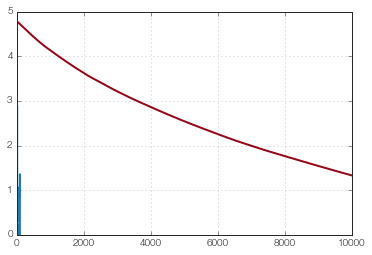

In [15]:
plot(opt_admm.storage.get('obj') - f_df_subg(x, penalty=0.)[0])
plot(opt_subg.storage.get('obj') - f_df_subg(x)[0])
ylim(0.,5.)

In [ ]:
descent?